### Feature egineering

- Check: https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10?gi=4adc73ab0614

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. As you may know, a “feature” is any measurable input that can be used in a predictive model — it could be the color of an object or the sound of someone’s voice. Feature engineering, in simple terms, is the act of converting raw observations into desired features using statistical or machine learning approaches.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mnist = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='label', ylabel='count'>

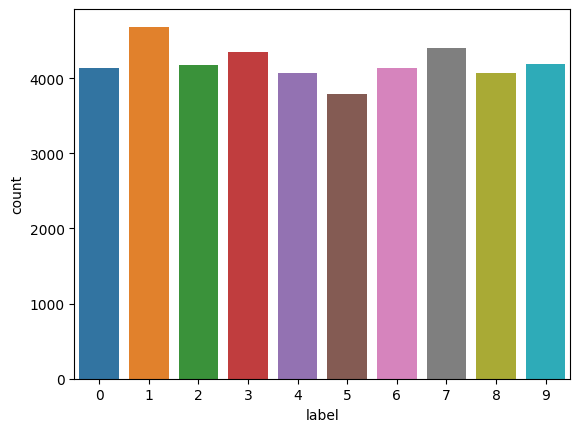

In [2]:
sns.countplot(data=mnist, x='label')

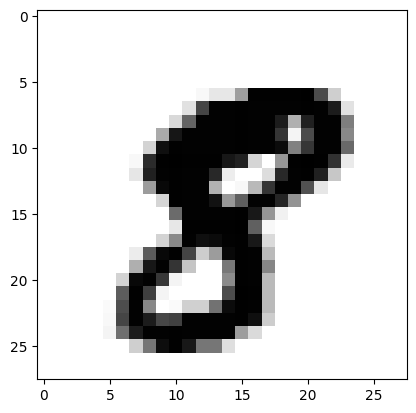

In [3]:
plt.imshow(np.array(mnist.iloc[10][1:]).reshape(28,28), cmap='binary')

<AxesSubplot:>

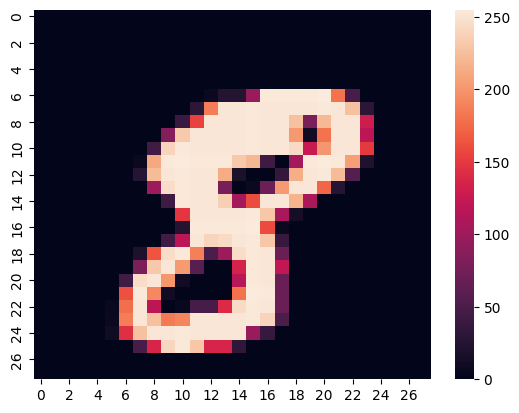

In [4]:
obs_10 = np.array(mnist.iloc[10][1:]).copy()
sns.heatmap(obs_10.reshape(28,28))

(array([573.,  18.,   7.,   8.,  10.,   9.,   7.,  14.,  13., 125.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

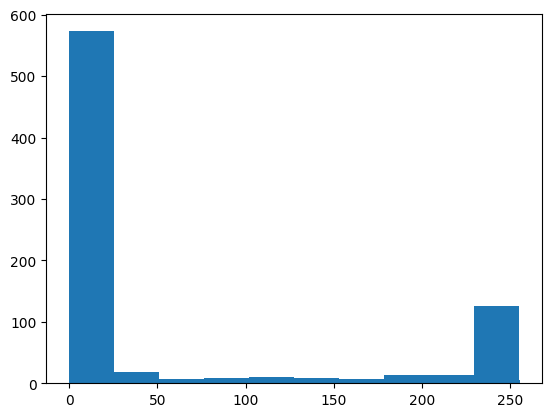

In [5]:
plt.bar(*np.unique(obs_10, return_counts=True))
plt.hist(obs_10)

<AxesSubplot:>

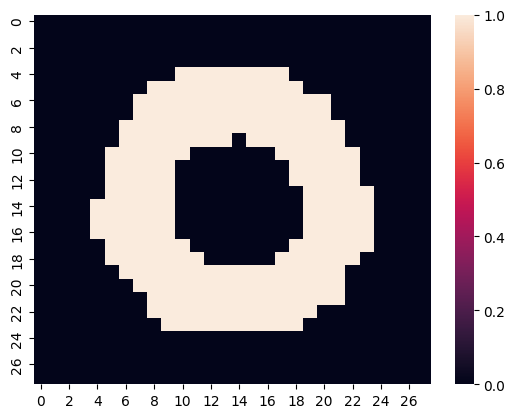

In [6]:
th = 250

# Get first 10 digits 0
digit_0 = mnist.query("label==0").head(100)
digit_0.drop(columns=['label'], inplace=True)

for obs_i in digit_0.iterrows():
    oi = obs_i[0]
    #print(oi)
    obs_i = np.array(obs_i[1])
    obs_i[np.where(obs_i)[0]] = 1
    #obs_i[np.where(obs_i<th)[0]] = 0
    #obs_i[np.where(obs_i>=th)[0]] = 1
    digit_0.loc[oi] = obs_i

sns.heatmap(np.array(digit_0.iloc[0]).reshape(28,28))

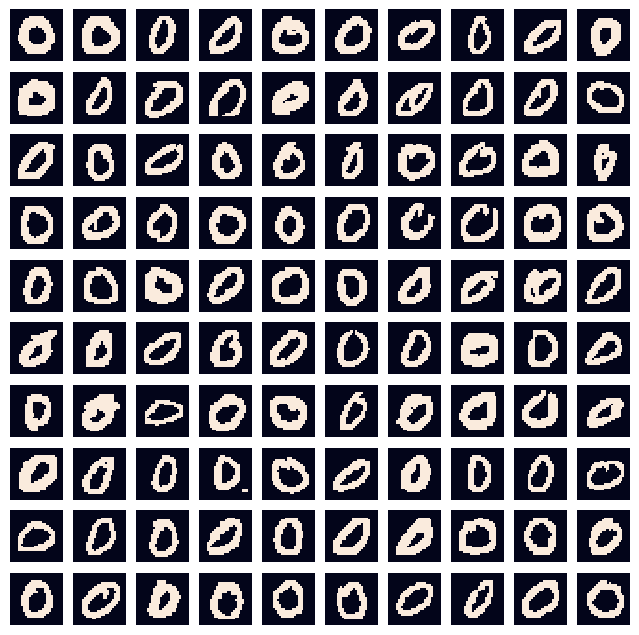

In [7]:
plt.figure(figsize=(8,8))
index = 0
for obs_i in digit_0.iterrows():
    plt.subplot(10, 10, index+1)
    sns.heatmap(np.array(obs_i[1]).reshape(28,28), cbar=False)
    plt.axis('off')
    index += 1

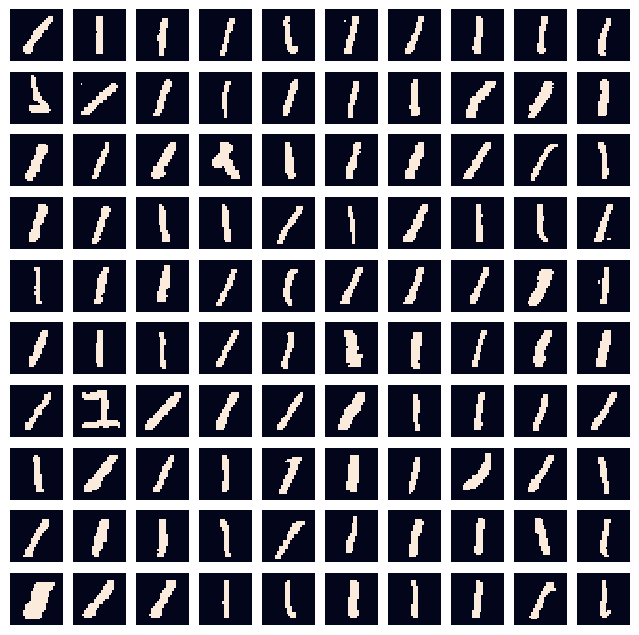

In [8]:
th = 250

# Get first 10 digits 1
digit_1 = mnist.query("label==1").head(100)
digit_1.drop(columns=['label'], inplace=True)

for obs_i in digit_1.iterrows():
    oi = obs_i[0]
    #print(oi)
    obs_i = np.array(obs_i[1])
    obs_i[np.where(obs_i)[0]] = 1
    #obs_i[np.where(obs_i<th)[0]] = 0
    #obs_i[np.where(obs_i>=th)[0]] = 1
    digit_1.loc[oi] = obs_i

plt.figure(figsize=(8,8))
index = 0
for obs_i in digit_1.iterrows():
    plt.subplot(10, 10, index+1)
    sns.heatmap(np.array(obs_i[1]).reshape(28,28), cbar=False)
    plt.axis('off')
    index += 1

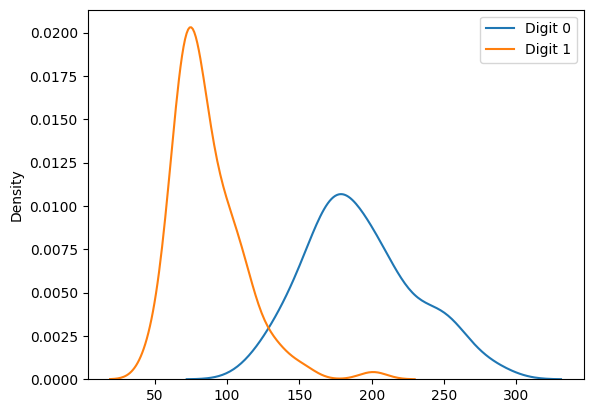

In [9]:
sns.kdeplot(digit_0.sum(axis=1))
sns.kdeplot(digit_1.sum(axis=1))
plt.legend(["Digit 0", "Digit 1"])

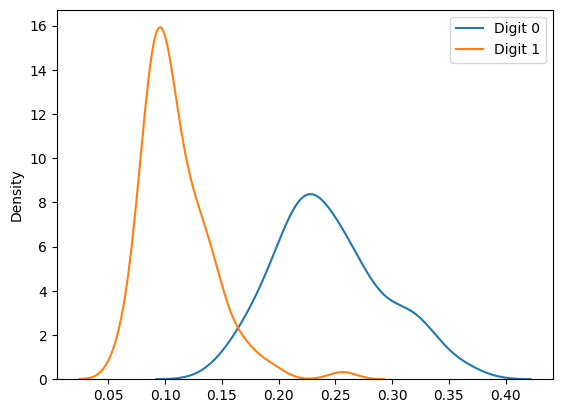

In [10]:
sns.kdeplot(digit_0.mean(axis=1))
sns.kdeplot(digit_1.mean(axis=1))
plt.legend(["Digit 0", "Digit 1"])

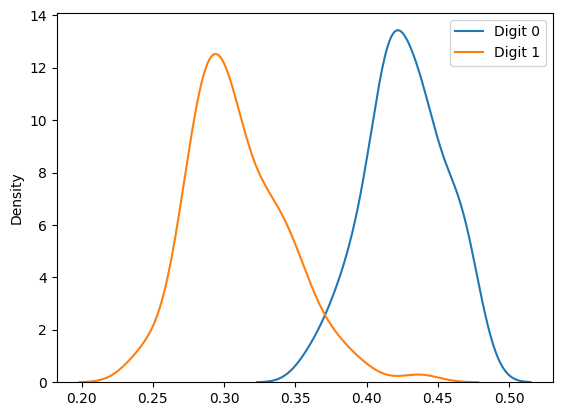

In [11]:
sns.kdeplot(digit_0.std(axis=1))
sns.kdeplot(digit_1.std(axis=1))
plt.legend(["Digit 0", "Digit 1"])

<AxesSubplot:>

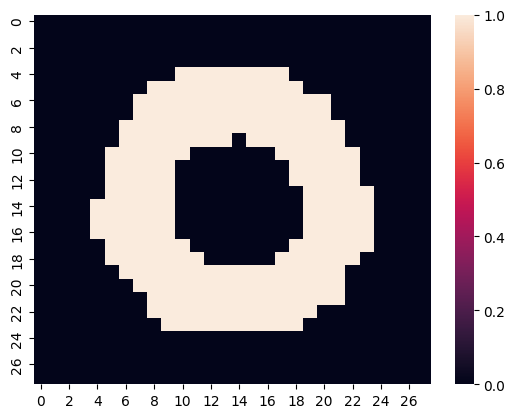

In [12]:
d00 = np.array(digit_0.iloc[0])
sns.heatmap(d00.reshape(28,28))

(0.0, 20.0)

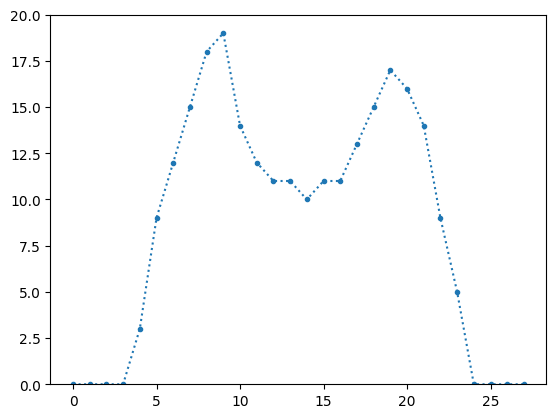

In [13]:
plt.plot(d00.reshape(28,28).sum(axis=0), ':.')
plt.ylim(0,20)

(0.0, 20.0)

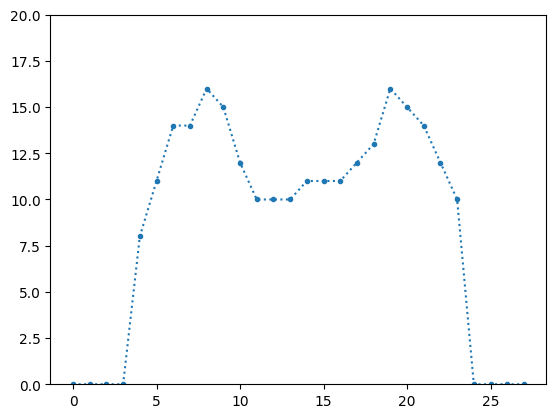

In [14]:
plt.plot(d00.reshape(28,28).sum(axis=1), ':.')
plt.ylim(0,20)

<AxesSubplot:>

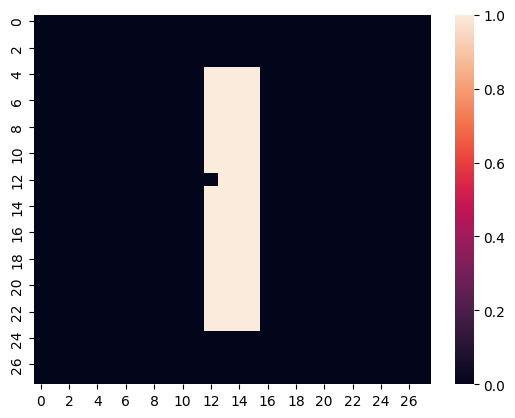

In [15]:
d10 = np.array(digit_1.iloc[1])
sns.heatmap(d10.reshape(28,28))

(0.0, 20.0)

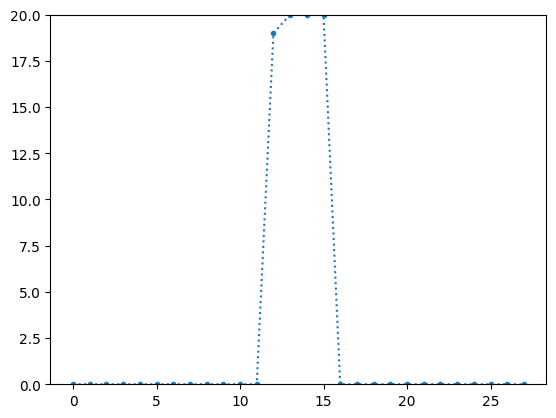

In [16]:
plt.plot(d10.reshape(28,28).sum(axis=0), ':.')
plt.ylim(0,20)

(0.0, 20.0)

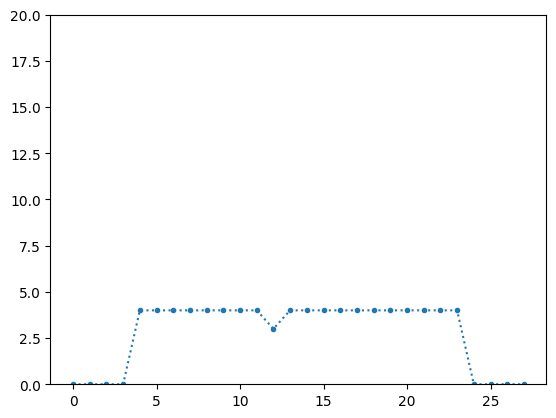

In [17]:
plt.plot(d10.reshape(28,28).sum(axis=1), ':.')
plt.ylim(0,20)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>